In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100%; }</style>"))
np.set_printoptions(precision=3, suppress=True)

In [2]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
faces

{'data': array([[0.31 , 0.368, 0.417, ..., 0.153, 0.161, 0.157],
        [0.455, 0.471, 0.512, ..., 0.153, 0.153, 0.153],
        [0.318, 0.401, 0.492, ..., 0.14 , 0.149, 0.153],
        ...,
        [0.5  , 0.533, 0.607, ..., 0.178, 0.149, 0.19 ],
        [0.215, 0.219, 0.219, ..., 0.574, 0.591, 0.603],
        [0.517, 0.463, 0.281, ..., 0.36 , 0.355, 0.384]], dtype=float32),
 'images': array([[[0.31 , 0.368, 0.417, ..., 0.372, 0.331, 0.306],
         [0.343, 0.405, 0.438, ..., 0.372, 0.339, 0.314],
         [0.343, 0.417, 0.45 , ..., 0.38 , 0.339, 0.298],
         ...,
         [0.215, 0.207, 0.223, ..., 0.153, 0.165, 0.174],
         [0.202, 0.211, 0.211, ..., 0.149, 0.161, 0.165],
         [0.202, 0.207, 0.202, ..., 0.153, 0.161, 0.157]],
 
        [[0.455, 0.471, 0.512, ..., 0.19 , 0.186, 0.186],
         [0.446, 0.483, 0.521, ..., 0.215, 0.211, 0.211],
         [0.496, 0.517, 0.533, ..., 0.202, 0.207, 0.207],
         ...,
         [0.773, 0.781, 0.793, ..., 0.145, 0.145, 0.145],

In [3]:
print(faces["DESCR"])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [4]:
data = faces["data"]
images = faces["images"]
target = faces["target"]

print(data.shape, images.shape, target.shape)

(400, 4096) (400, 64, 64) (400,)


In [5]:
target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

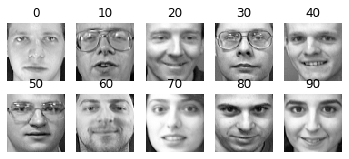

In [6]:
n_rows = 2
n_cols = 5

fig = plt.figure(figsize=(n_cols*1.2, n_rows*1.2))

for row in range(n_rows):
    for col in range(n_cols):
        idx = n_cols * row + col
        plt.subplot(n_rows, n_cols, idx + 1)
        plt.imshow(images[row*50 + 10*col], cmap="gray")
        plt.title(f"{row*50 + 10*col}")
        plt.grid()
        plt.axis("off")
        
        
# fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(n_cols*1.2, n_rows*1.2))
# for row in range(2):
#     for col in range(0, 5):
#         axes[row, col].imshow(images[row*50 + 10*col], cmap="gray")
#         axes[row, col].grid()
#         axes[row, col].axis("off")

In [7]:
X = data
y = target

In [8]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold

# skf = StratifiedKFold(n_splits=2)

# for train_idx, test_idx in skf.split(X, y):
#     X_train, X_test = X[train_idx], X[test_idx]
#     y_train, y_test = y[train_idx], y[test_idx]
#     print(len(X_train), "\n", pd.value_counts(y_train)[:5], "\n", pd.value_counts(y_test)[:5])

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3)

for train_idx, val_test_idx in sss.split(X, y):
    X_train, X_val_test = X[train_idx], X[val_test_idx]
    y_train, y_val_test = y[train_idx], y[val_test_idx]

print(len(X_train), pd.value_counts(y_train)[:5], pd.value_counts(y_val_test)[:5], sep="\n")

280
39    7
38    7
17    7
16    7
15    7
dtype: int64
39    3
38    3
17    3
16    3
15    3
dtype: int64


In [10]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=1/3, random_state=43)

for val_idx, test_idx in sss.split(X_val_test, y_val_test):
    X_val, X_test = X_val_test[val_idx], X_val_test[test_idx]
    y_val, y_test = y_val_test[val_idx], y_val_test[test_idx]

print(len(X_val), pd.value_counts(y_val)[:5], len(X_test), pd.value_counts(y_test)[:5], sep="\n")

80
39    2
38    2
17    2
16    2
15    2
dtype: int64
40
39    1
38    1
17    1
16    1
15    1
dtype: int64


In [11]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [12]:
np.unique(y_train), np.unique(y_val), np.unique(y_test)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]))

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)

X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [14]:
pca.n_components_

199

In [15]:
print(X_train.shape, X_train_pca.shape, sep="\n")

(280, 4096)
(280, 199)


In [16]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans = [KMeans(n_clusters=k, n_jobs=-1).fit(X_train_pca) for k in k_range]
inertias = [kmeans[idx].inertia_ for idx in range(len(kmeans))]

In [17]:
from sklearn.metrics import silhouette_score

silhouettes = [silhouette_score(X_train_pca, kmean.labels_) for kmean in kmeans]

In [18]:
best_index = np.argmax(silhouettes)
best_index

21

In [19]:
kmeans[best_index].n_clusters

110

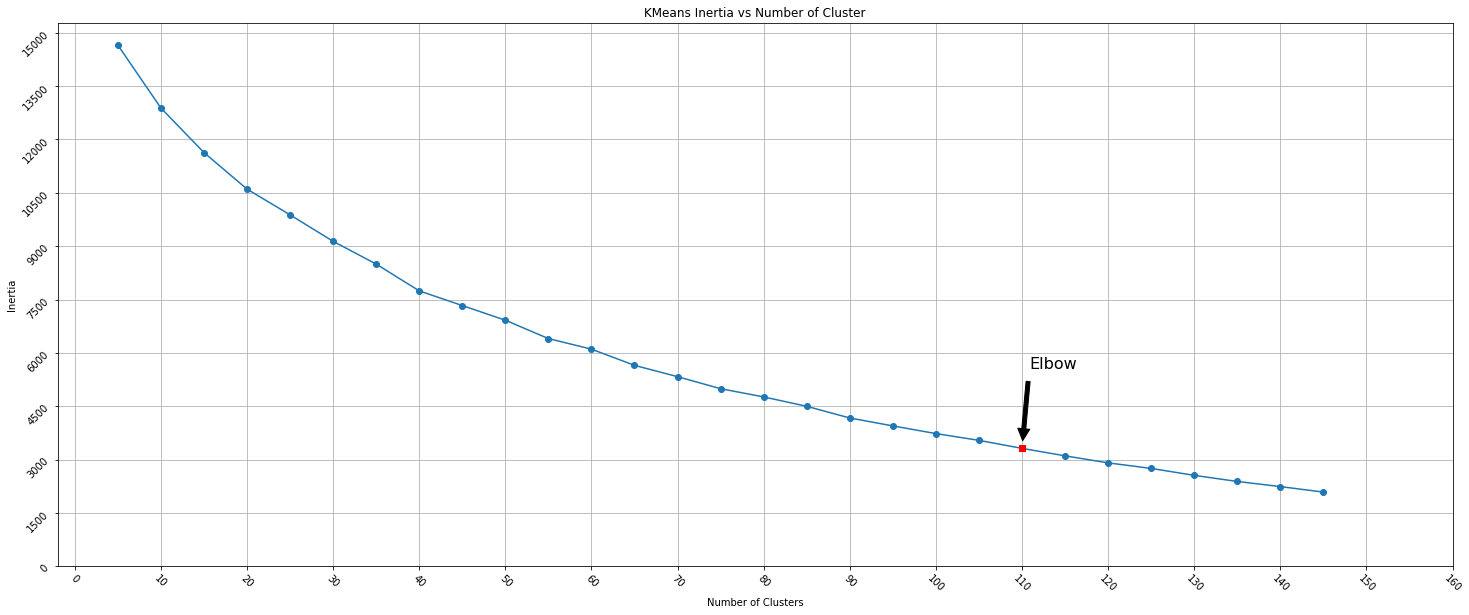

In [20]:
plt.figure(figsize=(25, 10))
plt.plot(k_range, inertias, "o-")
plt.plot(k_range[best_index], inertias[best_index], "rs")

plt.xlabel("Number of Clusters")
plt.xticks(np.linspace(0, 160, 17), rotation=-45)

plt.ylabel("Inertia", rotation=90)
plt.yticks(np.linspace(0, 15000, 11), rotation=45)

plt.title("KMeans Inertia vs Number of Cluster")
plt.grid(True)
plt.annotate("Elbow", xy=(kmeans[best_index].n_clusters, inertias[best_index]), xytext=(0.70, 0.40), textcoords="figure fraction", fontsize=16, arrowprops=dict(facecolor='black', shrink=0.1))

plt.show()

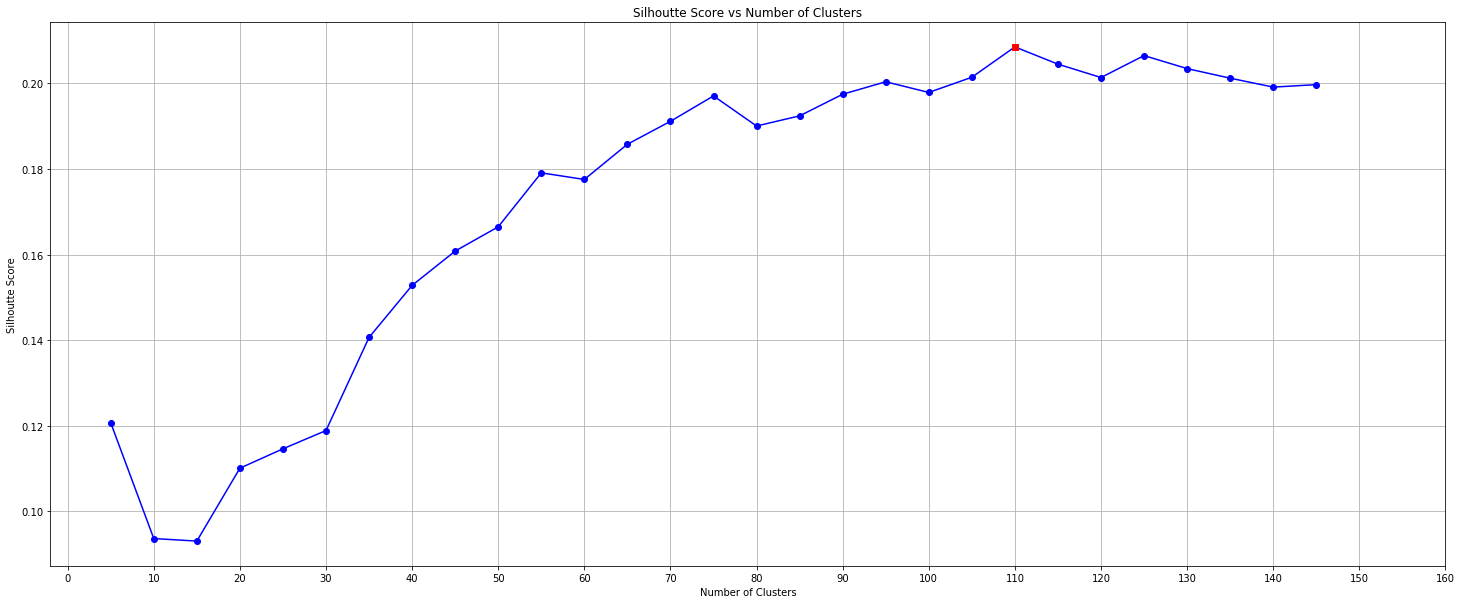

In [21]:
plt.figure(figsize=(25, 10))
plt.plot(k_range, silhouettes, "bo-")
plt.plot(k_range[best_index], silhouettes[best_index], "rs")

plt.xlabel("Number of Clusters")
plt.xticks(np.linspace(0, 160, 17))

plt.ylabel("Silhoutte Score")

plt.title("Silhoutte Score vs Number of Clusters")
plt.grid(True)

# The silhouette coefficient can vary between -1 and +1: 
# => a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, 
# => a coefficient close to 0 means that it is close to a cluster boundary, 
# => a coefficient close to -1 means that the instance may have been assigned to the wrong cluster. 

In [22]:
print(kmeans[best_index].cluster_centers_, kmeans[best_index].cluster_centers_.shape, sep="\n")

[[-2.865 -4.145 -3.273 ...  0.01   0.026  0.021]
 [ 1.055 -3.77   1.859 ... -0.064  0.029  0.057]
 [-0.64  -0.023  0.186 ...  0.018  0.103 -0.012]
 ...
 [ 2.617 -3.212  0.792 ...  0.124 -0.18  -0.235]
 [ 3.226  0.202  0.554 ...  0.018 -0.08  -0.099]
 [-3.453  2.795 -1.714 ...  0.004 -0.023  0.081]]
(110, 199)


In [23]:
print(kmeans[best_index].labels_, kmeans[best_index].labels_.shape, sep="\n")

[ 12  40  57  14  51  81   2  51  46  94  64  62  35   3  74  87   8  86
  85  26  88  65  33  26  93  41  39  77  80  84  18  59  41  18  45  27
  20  33  70  88  49  71  79  14   2  65  87  15  23   1  17  54  37   9
   0  37  47  27  74  35  14  36  33   3  90   9  65 103  20  31  12  13
  81  43   0  78  17  56  68  33  52   3  54   5  20  30  37  28  64   7
  82  54  51  38  55  26  29 108  18  21  49 104  60  34  47  35  55  23
   6   8  68 109  99  32  22  20  15   2  58  87   1  26  48  14  12   0
  34  68  38  18  30  63  78 100  86  72  24  49  32   9  40  70  13  42
  45  27  19  56  73  15  38  62  62  27   4  98 108  19  75 107  87  42
  76  82  71  57  57  28  55  48  50 105  14  33  20  78  30  67  17 101
 108   5   2  73  92 102  83   4  50   0  21  63  96   7   8   4  69  25
  97   8   6  66  59  92  90  36  71  57  28  33  34   9  23  32 108  31
  44  17  17  16  28  56  79   8   8  29  29  31  92  57   5  25  53  89
  58  18 108  90  28  10  66 106  10  62  91 103  5

In [24]:
from collections import Counter

clusters = Counter(kmeans[best_index].labels_)
clusters

Counter({12: 3,
         40: 2,
         57: 5,
         14: 5,
         51: 3,
         81: 2,
         2: 6,
         46: 2,
         94: 1,
         64: 2,
         62: 4,
         35: 3,
         3: 3,
         74: 2,
         87: 4,
         8: 6,
         86: 2,
         85: 1,
         26: 5,
         88: 3,
         65: 4,
         33: 6,
         93: 1,
         41: 2,
         39: 1,
         77: 1,
         80: 1,
         84: 1,
         18: 6,
         59: 2,
         45: 3,
         27: 4,
         20: 5,
         70: 2,
         49: 4,
         71: 3,
         79: 3,
         15: 3,
         23: 3,
         1: 2,
         17: 6,
         54: 3,
         37: 3,
         9: 6,
         0: 5,
         47: 2,
         36: 2,
         90: 3,
         103: 2,
         31: 3,
         13: 2,
         43: 1,
         78: 3,
         56: 4,
         68: 3,
         52: 4,
         5: 3,
         30: 3,
         28: 6,
         7: 2,
         82: 2,
         38: 3,
         55: 3,

In [25]:
largest_clusters = clusters.most_common()
largest_clusters

[(2, 6),
 (8, 6),
 (33, 6),
 (18, 6),
 (17, 6),
 (9, 6),
 (28, 6),
 (57, 5),
 (14, 5),
 (26, 5),
 (20, 5),
 (0, 5),
 (108, 5),
 (62, 4),
 (87, 4),
 (65, 4),
 (27, 4),
 (49, 4),
 (56, 4),
 (52, 4),
 (34, 4),
 (12, 3),
 (51, 3),
 (35, 3),
 (3, 3),
 (88, 3),
 (45, 3),
 (71, 3),
 (79, 3),
 (15, 3),
 (23, 3),
 (54, 3),
 (37, 3),
 (90, 3),
 (31, 3),
 (78, 3),
 (68, 3),
 (5, 3),
 (30, 3),
 (38, 3),
 (55, 3),
 (29, 3),
 (6, 3),
 (32, 3),
 (48, 3),
 (4, 3),
 (92, 3),
 (89, 3),
 (10, 3),
 (40, 2),
 (81, 2),
 (46, 2),
 (64, 2),
 (74, 2),
 (86, 2),
 (41, 2),
 (59, 2),
 (70, 2),
 (1, 2),
 (47, 2),
 (36, 2),
 (103, 2),
 (13, 2),
 (7, 2),
 (82, 2),
 (21, 2),
 (58, 2),
 (63, 2),
 (24, 2),
 (42, 2),
 (19, 2),
 (73, 2),
 (75, 2),
 (76, 2),
 (50, 2),
 (83, 2),
 (25, 2),
 (66, 2),
 (16, 2),
 (53, 2),
 (94, 1),
 (85, 1),
 (93, 1),
 (39, 1),
 (77, 1),
 (80, 1),
 (84, 1),
 (43, 1),
 (104, 1),
 (60, 1),
 (109, 1),
 (99, 1),
 (22, 1),
 (100, 1),
 (72, 1),
 (98, 1),
 (107, 1),
 (105, 1),
 (67, 1),
 (101, 1),
 (

In [26]:
useful_clusters = [(k, v) for (k, v) in largest_clusters if v >= 2]

print(round(len(useful_clusters) / len(largest_clusters), 3), useful_clusters, sep="\n")

0.727
[(2, 6), (8, 6), (33, 6), (18, 6), (17, 6), (9, 6), (28, 6), (57, 5), (14, 5), (26, 5), (20, 5), (0, 5), (108, 5), (62, 4), (87, 4), (65, 4), (27, 4), (49, 4), (56, 4), (52, 4), (34, 4), (12, 3), (51, 3), (35, 3), (3, 3), (88, 3), (45, 3), (71, 3), (79, 3), (15, 3), (23, 3), (54, 3), (37, 3), (90, 3), (31, 3), (78, 3), (68, 3), (5, 3), (30, 3), (38, 3), (55, 3), (29, 3), (6, 3), (32, 3), (48, 3), (4, 3), (92, 3), (89, 3), (10, 3), (40, 2), (81, 2), (46, 2), (64, 2), (74, 2), (86, 2), (41, 2), (59, 2), (70, 2), (1, 2), (47, 2), (36, 2), (103, 2), (13, 2), (7, 2), (82, 2), (21, 2), (58, 2), (63, 2), (24, 2), (42, 2), (19, 2), (73, 2), (75, 2), (76, 2), (50, 2), (83, 2), (25, 2), (66, 2), (16, 2), (53, 2)]


### Visualizing Clusters to See If Any Similarity

Cluster # 0


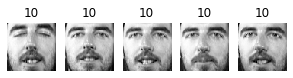

Cluster # 1


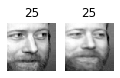

Cluster # 2


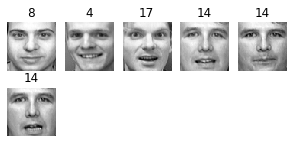

Cluster # 3


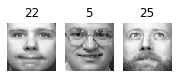

Cluster # 4


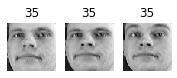

Cluster # 5


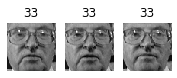

Cluster # 6


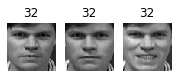

Cluster # 7


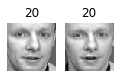

Cluster # 8


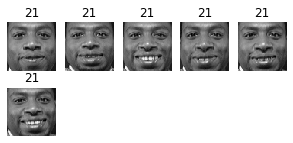

Cluster # 9


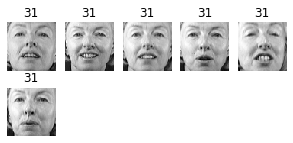

Cluster # 10


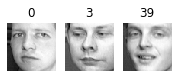

Cluster # 11


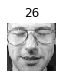

Cluster # 12


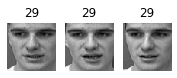

Cluster # 13


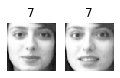

Cluster # 14


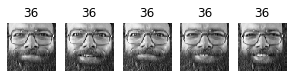

Cluster # 15


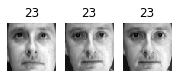

Cluster # 16


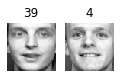

Cluster # 17


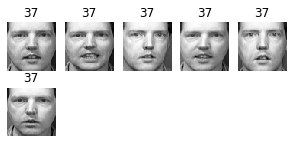

Cluster # 18


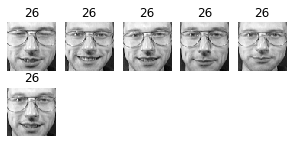

Cluster # 19


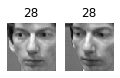

Cluster # 20


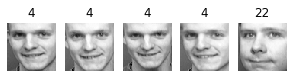

Cluster # 21


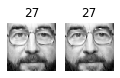

Cluster # 22


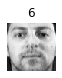

Cluster # 23


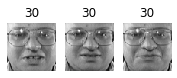

Cluster # 24


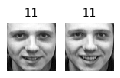

Cluster # 25


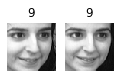

Cluster # 26


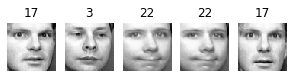

Cluster # 27


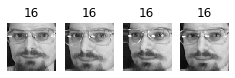

Cluster # 28


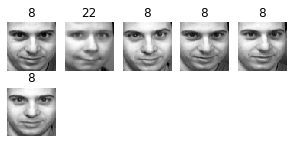

Cluster # 29


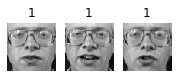

Cluster # 30


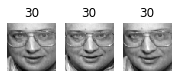

Cluster # 31


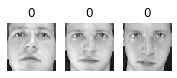

Cluster # 32


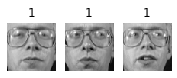

Cluster # 33


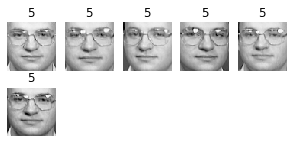

Cluster # 34


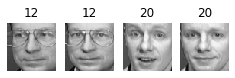

Cluster # 35


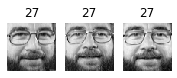

Cluster # 36


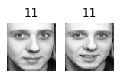

Cluster # 37


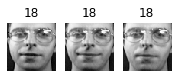

Cluster # 38


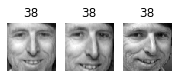

Cluster # 39


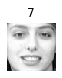

Cluster # 40


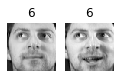

Cluster # 41


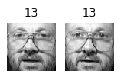

Cluster # 42


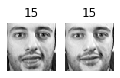

Cluster # 43


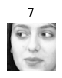

Cluster # 44


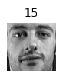

Cluster # 45


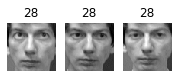

Cluster # 46


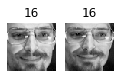

Cluster # 47


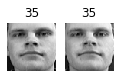

Cluster # 48


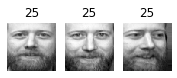

Cluster # 49


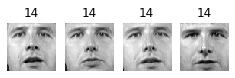

Cluster # 50


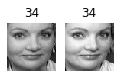

Cluster # 51


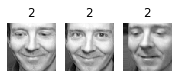

Cluster # 52


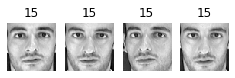

Cluster # 53


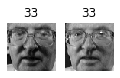

Cluster # 54


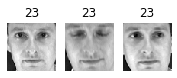

Cluster # 55


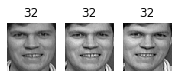

Cluster # 56


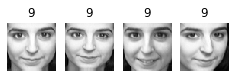

Cluster # 57


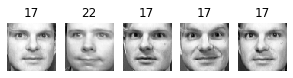

Cluster # 58


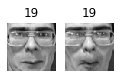

Cluster # 59


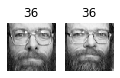

Cluster # 60


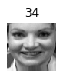

Cluster # 61


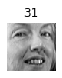

Cluster # 62


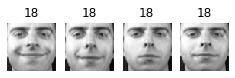

Cluster # 63


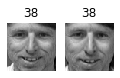

Cluster # 64


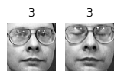

Cluster # 65


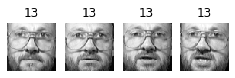

Cluster # 66


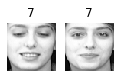

Cluster # 67


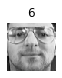

Cluster # 68


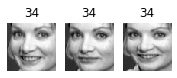

Cluster # 69


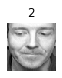

Cluster # 70


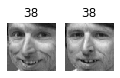

Cluster # 71


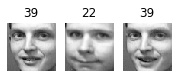

Cluster # 72


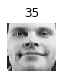

Cluster # 73


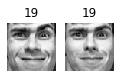

Cluster # 74


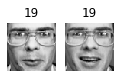

Cluster # 75


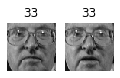

Cluster # 76


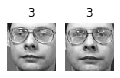

Cluster # 77


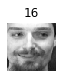

Cluster # 78


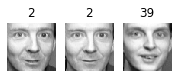

Cluster # 79


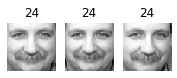

Cluster # 80


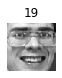

Cluster # 81


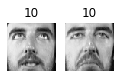

Cluster # 82


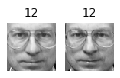

Cluster # 83


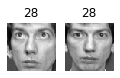

Cluster # 84


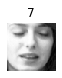

Cluster # 85


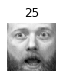

Cluster # 86


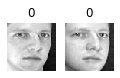

Cluster # 87


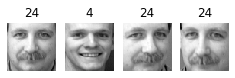

Cluster # 88


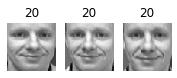

Cluster # 89


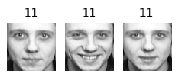

Cluster # 90


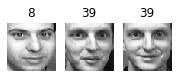

Cluster # 91


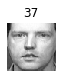

Cluster # 92


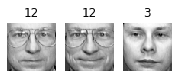

Cluster # 93


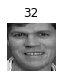

Cluster # 94


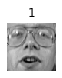

Cluster # 95


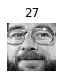

Cluster # 96


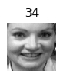

Cluster # 97


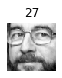

Cluster # 98


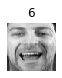

Cluster # 99


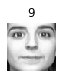

Cluster # 100


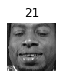

Cluster # 101


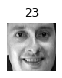

Cluster # 102


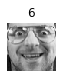

Cluster # 103


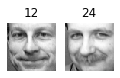

Cluster # 104


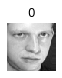

Cluster # 105


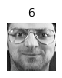

Cluster # 106


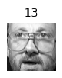

Cluster # 107


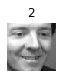

Cluster # 108


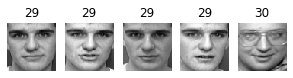

Cluster # 109


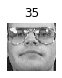

In [27]:
def display_cluster_images(imgs, tgts, n_cols=5):
    n_rows = len(imgs) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows*1.1))
    for idx, (img, tgt) in enumerate(zip(imgs, tgts)):
        plt.subplot(n_rows, n_cols, idx + 1)
        plt.imshow(img.reshape(64, 64), cmap="gray")
        plt.title(f"{tgt}")
        plt.grid(False)
        plt.axis("off")
    plt.show()
    
for cluster_num in np.unique(kmeans[best_index].labels_):
    img_idx = np.flatnonzero(kmeans[best_index].labels_ == cluster_num)
    img_subset = X_train[img_idx].reshape(-1, 64, 64)
    tgt_subset = y_train[img_idx]
    print(f"Cluster # {cluster_num}")
    display_cluster_images(img_subset, tgt_subset)

### Verifying Classifier Accuracy

In [28]:
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression()
logreg_clf.fit(X_train_pca, y_train)

/Users/asd/.virtualenvs/ds/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
from sklearn.metrics import accuracy_score

y_pred = logreg_clf.predict(X_val_pca)
accuracy_score(y_pred, y_val)

0.9625

In [30]:
logreg_clf.score(X_val_pca, y_val)

0.9625

In [31]:
from sklearn.ensemble import RandomForestClassifier

rndforest_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rndforest_clf.fit(X_train_pca, y_train)
rndforest_clf.score(X_val_pca, y_val)

0.925

In [32]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train_pca, y_train)
sgd.score(X_val_pca, y_val)

0.8625

### Use KMeans for Dimensionality Reduction

In [33]:
X_train_reduced = kmeans[best_index].transform(X_train_pca)
X_val_reduced = kmeans[best_index].transform(X_val_pca)
X_test_reduced = kmeans[best_index].transform(X_test_pca)

In [34]:
X_train.shape, X_train_reduced.shape, X_val_reduced.shape, X_test_reduced.shape

((280, 4096), (280, 110), (80, 110), (40, 110))

In [35]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train_reduced, y_train)
logreg_clf.score(X_val_reduced, y_val)

/Users/asd/.virtualenvs/ds/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9

In [36]:
rndforest_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rndforest_clf.fit(X_train_reduced, y_train)
rndforest_clf.score(X_val_reduced, y_val)

0.725

In [37]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans()),
    ("logreg_clf", LogisticRegression())
])

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"kmeans__n_clusters": np.arange(50, 150, 5)}
]

gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring="accuracy", verbose=2, n_jobs=-1)
gridsearch.fit(X_train_pca, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.4s finished
/Users/asd/.virtualenvs/ds/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=8, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('logreg_clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                  

In [39]:
gridsearch.best_params_

{'kmeans__n_clusters': 140}

In [40]:
gridsearch.score(X_val_pca, y_val)

0.9

In [41]:
X_train_expended = np.c_[X_train_pca, X_train_reduced]
X_val_expended = np.c_[X_val_pca, X_val_reduced]
X_test_expended = np.c_[X_test_pca, X_test_reduced]

In [42]:
X_train_expended.shape, X_val_expended.shape, X_test_expended.shape

((280, 309), (80, 309), (40, 309))

In [43]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train_expended, y_train)
logreg_clf.score(X_val_expended, y_val)

/Users/asd/.virtualenvs/ds/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.925

In [44]:
rndforest_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rndforest_clf.fit(X_train_expended, y_train)
rndforest_clf.score(X_val_expended, y_val)

0.8125

### Gaussian Mixture Model (GMM)

In [45]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=kmeans[best_index].n_clusters)
gm.fit(X_train_pca)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=110, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [46]:
len(gm.weights_), gm.weights_

(110, array([0.014, 0.011, 0.004, 0.011, 0.004, 0.007, 0.011, 0.004, 0.021,
        0.021, 0.018, 0.014, 0.004, 0.018, 0.011, 0.021, 0.014, 0.014,
        0.007, 0.007, 0.021, 0.021, 0.018, 0.021, 0.014, 0.007, 0.021,
        0.014, 0.011, 0.011, 0.011, 0.011, 0.007, 0.007, 0.004, 0.004,
        0.007, 0.025, 0.007, 0.007, 0.018, 0.011, 0.007, 0.004, 0.011,
        0.011, 0.014, 0.007, 0.011, 0.011, 0.004, 0.007, 0.004, 0.011,
        0.014, 0.007, 0.007, 0.011, 0.011, 0.004, 0.007, 0.011, 0.011,
        0.004, 0.004, 0.007, 0.007, 0.011, 0.025, 0.007, 0.007, 0.007,
        0.007, 0.011, 0.011, 0.004, 0.007, 0.004, 0.004, 0.004, 0.004,
        0.004, 0.007, 0.007, 0.014, 0.007, 0.007, 0.004, 0.007, 0.007,
        0.004, 0.004, 0.007, 0.007, 0.007, 0.004, 0.007, 0.004, 0.004,
        0.007, 0.004, 0.007, 0.004, 0.007, 0.004, 0.004, 0.007, 0.004,
        0.007, 0.007]))

In [47]:
len(gm.means_), gm.means_

(110, array([[ 0.007,  0.638,  2.618, ...,  0.058, -0.112,  0.018],
        [ 7.952,  1.181, -0.082, ..., -0.073, -0.012,  0.069],
        [-3.491,  0.808,  2.566, ..., -0.121,  0.122, -0.085],
        ...,
        [-3.897, -3.702,  3.582, ..., -0.033,  0.038, -0.003],
        [ 0.289, -2.528, -0.071, ..., -0.106,  0.035,  0.033],
        [-3.983,  2.513,  0.426, ..., -0.037,  0.115,  0.076]]))

In [48]:
len(gm.covariances_), gm.covariances_

(110, array([[[ 3.51 , -1.061,  0.458, ...,  0.064,  0.048,  0.107],
         [-1.061,  0.366, -0.191, ..., -0.005, -0.047, -0.036],
         [ 0.458, -0.191,  0.144, ..., -0.007,  0.033,  0.003],
         ...,
         [ 0.064, -0.005, -0.007, ...,  0.006, -0.01 ,  0.   ],
         [ 0.048, -0.047,  0.033, ..., -0.01 ,  0.03 ,  0.012],
         [ 0.107, -0.036,  0.003, ...,  0.   ,  0.012,  0.014]],
 
        [[ 0.259, -0.415,  0.195, ..., -0.064, -0.048, -0.108],
         [-0.415,  0.811, -0.353, ...,  0.088,  0.065,  0.164],
         [ 0.195, -0.353,  0.158, ..., -0.044, -0.033, -0.079],
         ...,
         [-0.064,  0.088, -0.044, ...,  0.017,  0.013,  0.028],
         [-0.048,  0.065, -0.033, ...,  0.013,  0.01 ,  0.021],
         [-0.108,  0.164, -0.079, ...,  0.028,  0.021,  0.046]],
 
        [[ 0.   , -0.   , -0.   , ...,  0.   , -0.   ,  0.   ],
         [-0.   ,  0.   ,  0.   , ..., -0.   ,  0.   , -0.   ],
         [-0.   ,  0.   ,  0.   , ..., -0.   ,  0.   , -0.   ],
 

In [49]:
gm.converged_

True

In [50]:
gm.n_iter_

2

In [51]:
gm.predict(X_val_pca)

array([  8,  22,  11,  62,  75,  60,  76,  24,  61,  68, 101,  28,   4,
        84,  15,  38,  42,  23,  22,  15,  22,  13,  29,  27,  54,  46,
         3,  26,  21,  44,  69,  93,  58,  41,  17,  24,   6,  32,  47,
        23,  76,  39,   9,  94, 106,  37,   9,  71,  88,  68,  40,  40,
        45,  39,  20,  68,  15,  48,  74,  54, 108,  41,  88,  54,  56,
        68,  69,  15,  68,  11,   8,  32,   0,  52,  37,  20,  28,  93,
        50,  62])

In [52]:
gm.predict_proba(X_val_pca)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
X_new, y_new = gm.sample(10)
X_new_original = pca.inverse_transform(X_new)

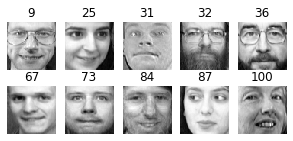

In [54]:
display_cluster_images(X_new_original.reshape(-1, 64,64) , y_new)

### GMM - Anomaly Detection

In [55]:
from scipy.ndimage import rotate

X_train_sample_rotate = rotate(X_train[0].reshape(64, 64), angle=90)

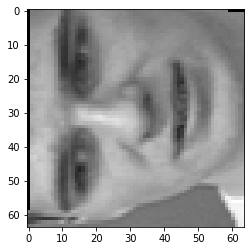

In [56]:
plt.imshow(X_train_sample_rotate , cmap="gray")

In [57]:
X_train_sample_pca = pca.transform(X_train_sample_rotate.reshape(-1, 4096))

In [58]:
densities = gm.score_samples(X_train_sample_pca)
densities

array([-43249718.547])

In [59]:
densities = gm.score_samples(X_train_pca)
densities

array([1149.731, 1178.171, 1155.379, 1155.757, 1170.069, 1178.155,
       1163.252, 1170.069, 1178.221, 1170.219, 1178.115, 1164.2  ,
       1186.14 , 1170.483, 1178.292, 1141.342, 1148.906, 1186.14 ,
       1170.472, 1148.473, 1170.848, 1170.65 , 1149.022, 1148.473,
       1170.696, 1170.568, 1178.145, 1186.14 , 1170.459, 1186.14 ,
       1147.893, 1178.135, 1170.568, 1147.893, 1171.152, 1170.725,
       1171.133, 1149.022, 1178.602, 1170.848, 1171.396, 1163.421,
       1141.342, 1155.757, 1163.421, 1170.65 , 1148.359, 1172.325,
       1170.967, 1141.342, 1148.359, 1162.664, 1171.496, 1146.894,
       1156.071, 1171.496, 1178.402, 1170.725, 1178.292, 1178.183,
       1155.757, 1178.242, 1149.022, 1186.14 , 1140.366, 1146.894,
       1170.65 , 1170.602, 1171.133, 1170.322, 1149.731, 1178.318,
       1178.155, 1186.14 , 1156.071, 1178.875, 1148.359, 1178.294,
       1170.876, 1149.022, 1171.577, 1170.483, 1162.664, 1156.821,
       1186.14 , 1164.733, 1171.496, 1163.252, 1178.115, 1178.

In [60]:
density_threshold = np.percentile(densities, 4)
density_threshold

1141.3417632375053

In [61]:
anomalies = X_train_pca[densities < density_threshold]
anomalies

array([[ 1.008, -3.339,  0.463, ..., -0.068,  0.144, -0.121],
       [ 0.769, -3.82 ,  1.375, ..., -0.031,  0.055, -0.039],
       [-0.793, -0.8  ,  2.661, ..., -0.101, -0.058, -0.084],
       ...,
       [ 1.265, -0.941,  2.844, ...,  0.178,  0.177, -0.112],
       [ 3.24 , -2.052,  3.603, ..., -0.153,  0.151, -0.028],
       [-0.794, -3.874,  1.943, ...,  0.025, -0.052, -0.02 ]],
      dtype=float32)